# Import libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data loading and preprocessing

In [52]:
df = pd.read_csv("diabetes.csv")


In [29]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [32]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


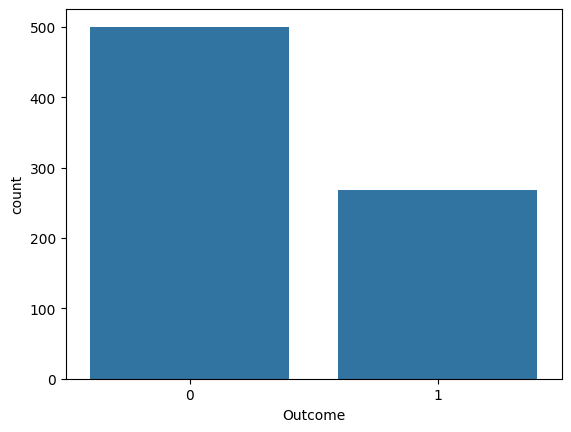

In [33]:
sns.countplot(data=df, x=df["Outcome"])
plt.show()

# Upsampling

In [34]:
negative_data = df[df["Outcome"] == 0]
positive_data = df[df["Outcome"] == 1]

In [53]:
positive_upsample = resample(positive_data,
                             replace=True,
                             n_samples=int(0.9*len(negative_data)),
                             random_state=42)

In [55]:
new_df = pd.concat([negative_data, positive_upsample])

# Optionally shuffle the data and reset index
new_df = new_df.sample(frac=1).reset_index(drop=True)

# Print the shape of the new dataframe
print(new_df.shape)

(950, 9)


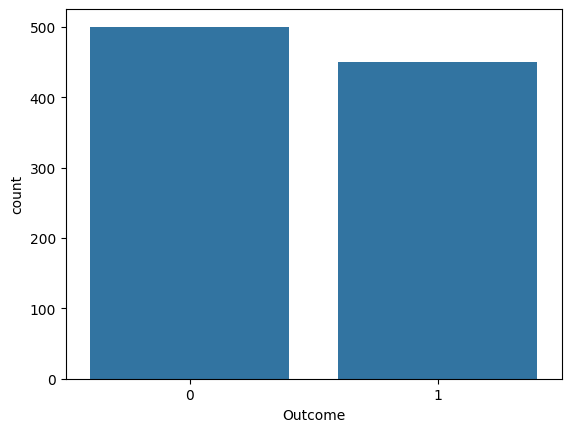

In [56]:
new_df = new_df.sample(frac=1)
sns.countplot(data=new_df, x=new_df["Outcome"])
plt.show()

In [57]:
x = new_df.drop("Outcome", axis=1)
y = new_df[["Outcome"]]

In [58]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(x)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(scaled_values, y, test_size=0.2)

# KNN with elbow plot

In [60]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
accuracy_values = []

In [61]:
for i in tqdm(range(len(k_values))):
    model = KNeighborsClassifier(n_neighbors=k_values[i])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

  0%|          | 0/25 [00:00<?, ?it/s]

In [62]:
px.line(x=k_values, y=accuracy_values)

In [63]:
optimal_k = -1
optimal_accuracy = -1
for i in list(zip(k_values, accuracy_values)):
    if i[1] > optimal_accuracy:
        optimal_k = i[0]
        optimal_accuracy = i[1]

In [64]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)

In [65]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [66]:
y_pred = knn_model.predict(x_test)

In [67]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        94
           1       0.80      0.83      0.82        96

    accuracy                           0.81       190
   macro avg       0.81      0.81      0.81       190
weighted avg       0.81      0.81      0.81       190



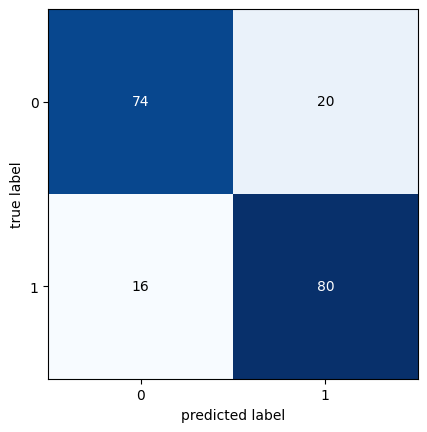

In [68]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)
plt.show()

In [69]:
y_score = model.predict_proba(x_test)[:,1]

In [70]:
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_test, y_score)

In [71]:
print('roc_auc_score for DecisionTree: ', metrics.roc_auc_score(y_test, y_score))

roc_auc_score for DecisionTree:  0.7918328900709221


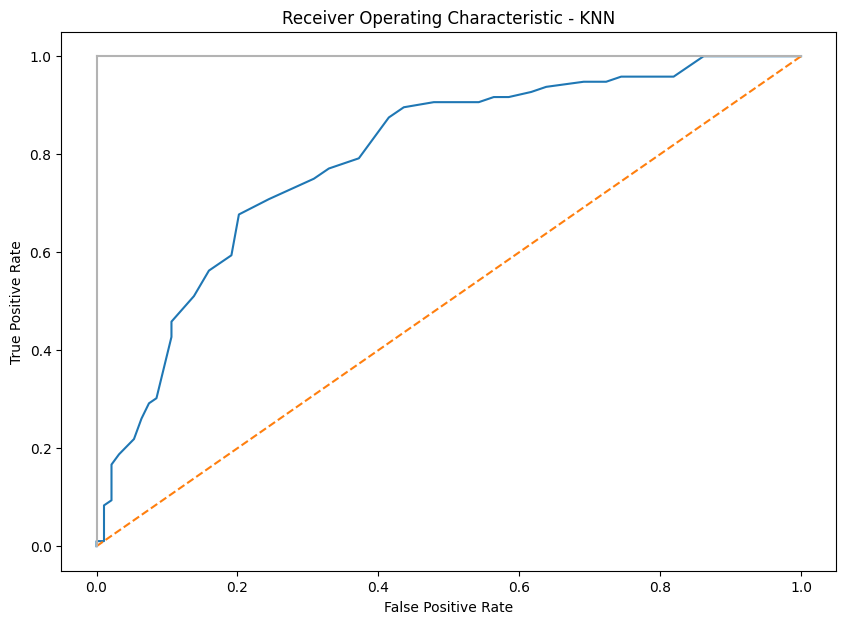

In [72]:
plt.subplots(1, figsize=(10,7))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Here's a brief explanation of the plots and the KNN algorithm as used in your diabetes dataset implementation:

### K-Nearest Neighbors (KNN) Overview:
KNN is a simple and effective supervised learning algorithm used for classification and regression tasks. It works by finding the \( k \) closest data points (neighbors) to a given test point based on a specified distance metric, usually Euclidean distance. The test point's class is then determined by a majority vote among its \( k \) nearest neighbors. KNN is particularly intuitive and works well for small datasets, but its performance can be sensitive to the choice of \( k \), distance metric, and feature scaling. In your implementation, the elbow plot is used to find the optimal value of \( k \) that balances model complexity and prediction accuracy.

### Plot Explanations:

1. **Elbow Plot for KNN**:
   - This plot shows the relationship between different values of \( k \) (number of neighbors) and the corresponding model accuracy.
   - As \( k \) increases, you may notice an improvement in accuracy up to a point, beyond which further increases may cause the model to become too generalized (underfitting). The point where accuracy starts to level off is often considered the "elbow" and represents the optimal value of \( k \).

2. **Confusion Matrix Plot**:
   - This plot visually represents the performance of your KNN classifier by showing the counts of true positives, true negatives, false positives, and false negatives.
   - It's a useful tool for understanding how well the model classifies each category (e.g., predicting diabetes vs. no diabetes) and helps identify where errors are occurring.

3. **ROC Curve**:
   - The Receiver Operating Characteristic (ROC) curve is a graphical representation of a classifier’s performance across different threshold values.
   - It plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity). A classifier that performs perfectly would have a curve that hugs the top left corner, and the area under the curve (AUC) would be 1.
   - In your KNN implementation, the ROC curve helps evaluate how well the model distinguishes between positive and negative classes (diabetes vs. no diabetes). A higher AUC score indicates better performance.

By using these plots, you gain insights into the performance, accuracy, and potential trade-offs of your KNN model, helping to optimize it for better predictive accuracy and interpretability.